In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


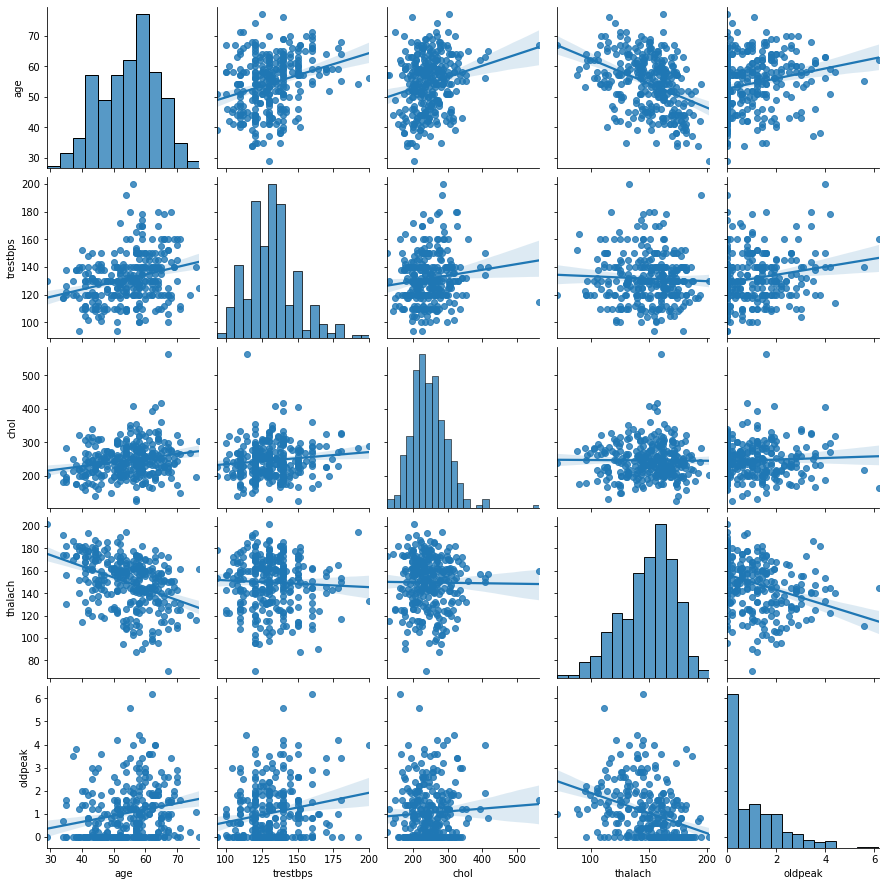

In [6]:
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak']], kind='reg');

,age,trestbps,chol,thalach,oldpeak
age,NaN,NaN,NaN,NaN,NaN
trestbps,0.279351,NaN,NaN,NaN,NaN
chol,0.213678,0.123174,NaN,NaN,NaN
thalach,-0.398522,-0.046698,-0.009940,NaN,NaN
oldpeak,0.210013,0.193216,0.053952,-0.344187,NaN


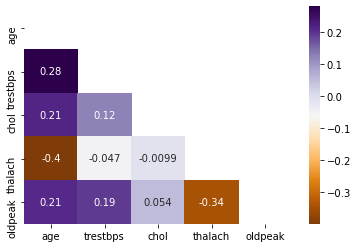

In [7]:
mask =np.triu(np.ones_like(df[['age','trestbps','chol','thalach','oldpeak']].corr().abs(), dtype=bool))
sns.heatmap(df[['age','trestbps','chol','thalach','oldpeak']].corr(), cmap = 'PuOr',mask=mask, annot=True);
corr_matrix = df[['age','trestbps','chol','thalach','oldpeak']].corr()
corr_matrix.mask(mask)

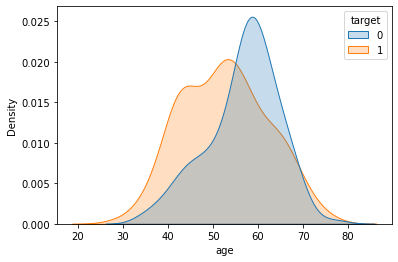

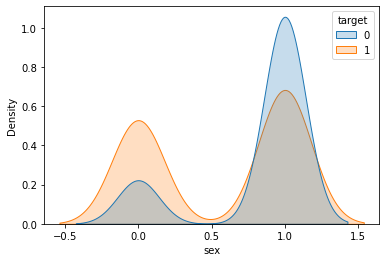

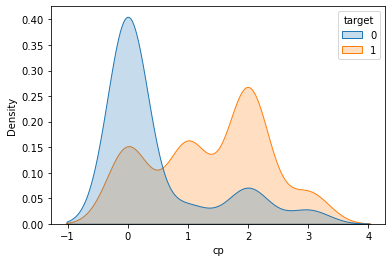

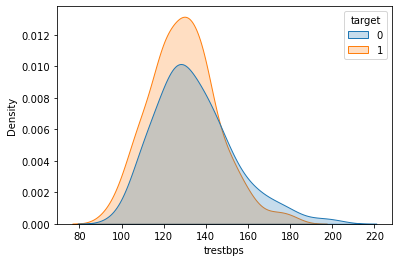

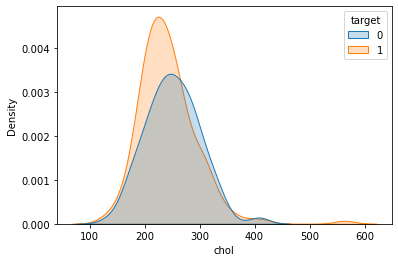

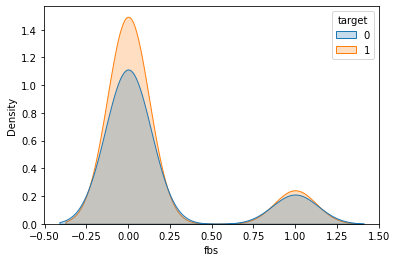

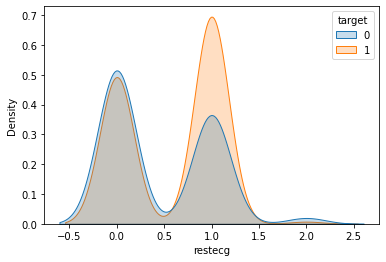

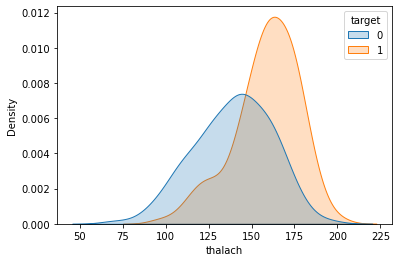

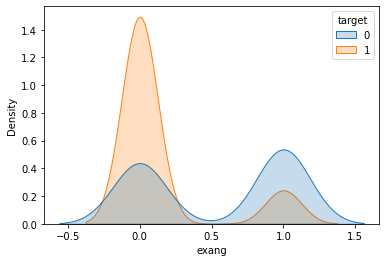

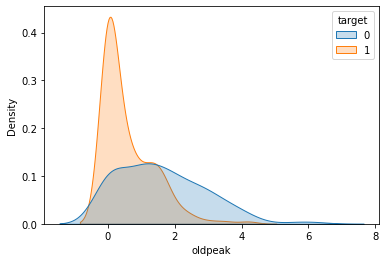

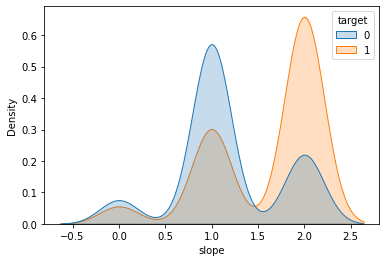

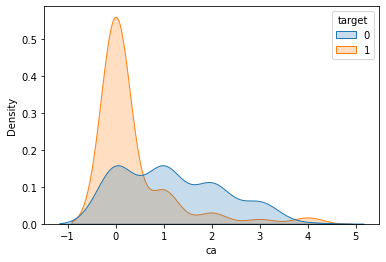

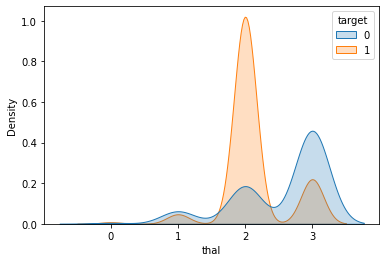

In [8]:
for i in df.drop('target',axis=1).columns:
    sns.kdeplot(data=df,x=i,hue='target',shade=True)
    plt.show()

In [9]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Importing useful libraries. Note I used some custom functionality imported from func.py

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, RFE
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score

from func import PearsonSelector, MinMaxCust, CustomEstimator                #from func.py

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 15)

Let's visualize whether the dataset could be described by few principal components

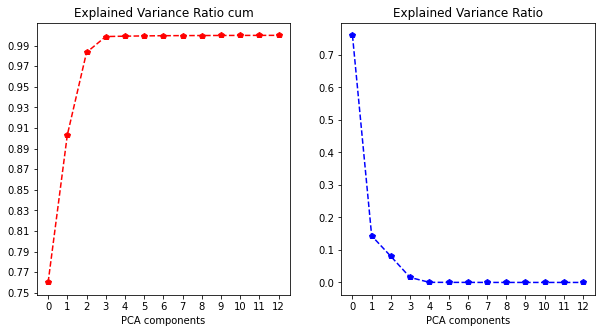

In [12]:
pca = PCA()

pca.fit(X_train)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].plot(pca.explained_variance_ratio_.cumsum(), 'pr--')
ax[0].set(title='Explained Variance Ratio cum', xticks = [i for i in range(13)], yticks = [i for i in np.arange(0.75,1,0.02)],xlabel = 'PCA components')
ax[1].plot(pca.explained_variance_ratio_, 'pb--')
ax[1].set(title='Explained Variance Ratio', xticks = [i for i in range(13)], xlabel = 'PCA components');


Looks like 3 components should fit

Defining a param grid with both estimators and associated parameters to feed the pipelines with

In [13]:
params = [{'model': [LogisticRegression()],
                    'model__C': [1,5,10,20,100],
                    'model__max_iter': [300,500]},
          
          {'model': [KNeighborsClassifier()],
                    'model__n_neighbors': [i for i in range (1,11)]},
          
          {'model': [DecisionTreeClassifier()],
                    'model__criterion': ['gini', 'entropy'],
                    'model__min_samples_leaf': [i for i in range(1,6)],
                    'model__max_depth': [i for i in range(1,6)]},
          
          {'model': [RandomForestClassifier()],
                    'model__n_estimators': [200,300],
                    'model__max_depth': [i for i in range(1,6)]},
          
          {'model': [xgb.XGBClassifier()],
                    'model__n_estimators': [100,1000]},   
          ]


Defining the pipelines I am willing to use. Note that CustomEstimator simply acts as a placeholder for the estimators in the grid above. The goal is performing hyperparameter tuning and selecting the best pipeline atoghether.

In [ ]:
pipe_dict = {}
pipe_dict['PCA'] = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=3)), ('model', CustomEstimator())])
pipe_dict['RFE'] = Pipeline([('scaler', MinMaxScaler()),('rfe',RFE(LogisticRegression(max_iter=500))), ('model', CustomEstimator())])
pipe_dict['SelectFromModel'] = Pipeline([('selector', SelectFromModel(LogisticRegression(max_iter = 1000))), ('model', CustomEstimator())])
pipe_dict['SelectKBest'] = Pipeline([('selector', SelectKBest(chi2, k = 3)), ('model', CustomEstimator())])

results = {} 
for name, pipe in pipe_dict.items():
    gs = GridSearchCV(pipe, param_grid = params, scoring = 'roc_auc', cv=10, verbose=1)
    gs.fit(X_train, y_train)
    probs = gs.best_estimator_.predict_proba(X_test)[:,1]
    preds = gs.best_estimator_.predict(X_test)
    results[(name, gs.best_estimator_['model'])] = roc_auc_score(y_test, probs), f1_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds)



In [18]:
results

{('PCA', LogisticRegression(C=5, max_iter=300)): (0.9372294372294372,
  0.8615384615384615,
  0.8484848484848485,
  0.875),
 ('RFE',
  RandomForestClassifier(max_depth=3, n_estimators=200)): (0.9188311688311689, 0.7999999999999999, 0.7272727272727273, 0.8888888888888888),
 ('SelectFromModel',
  RandomForestClassifier(max_depth=3, n_estimators=300)): (0.9329004329004328, 0.819672131147541, 0.7575757575757576, 0.8928571428571429),
 ('SelectKBest',
  RandomForestClassifier(max_depth=2, n_estimators=300)): (0.8777056277056277, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182)}

In [19]:
names = ['PCA - LogR', 'RFE - RF', 'SelectFromModel - RF', 'SelectKBest - RF']
scores = []
for k,v in results.items():
    scores.append(v)
pd.DataFrame(scores, index = names, columns = ['AUC', 'F1', 'Recall','Precision'])

,AUC,F1,Recall,Precision
PCA - LogR,0.937229,0.861538,0.848485,0.875000
RFE - RF,0.918831,0.800000,0.727273,0.888889
SelectFromModel - RF,0.932900,0.819672,0.757576,0.892857
SelectKBest - RF,0.877706,0.818182,0.818182,0.818182


Looks like LogisticRegression associated to PCA performed the best according to almost all evaluated metrics